/tmp/ipykernel_372/3274841739.py:28: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  t=linspace(t_ini,t_fin,numsteps)
/tmp/ipykernel_372/3274841739.py:30: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  x=zeros(numsteps)
/tmp/ipykernel_372/3274841739.py:31: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  y=zeros(numsteps)
/tmp/ipykernel_372/3274841739.py:32: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  z=zeros(numsteps)


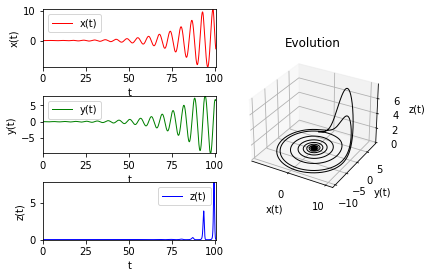

In [1]:
##First we load some packages.
from numpy import *
from matplotlib import *
from scipy import *
from pylab import figure, show, setp
from mpl_toolkits.mplot3d import Axes3D

#We define a function which is going to be the recursive function.
def num_rossler(x_n,y_n,z_n,h,a,b,c):
    x_n1=x_n+h*(-y_n-z_n)
    y_n1=y_n+h*(x_n+a*y_n)
    z_n1=z_n+h*(b+z_n*(x_n-c))   
    return x_n1,y_n1,z_n1

#Now we prepare some variables
#First the parameters
a=0.13
b=0.2
c=6.5

#Them the time interval and the step size
t_ini=0
t_fin=32*pi
h=0.0001
numsteps=int((t_fin-t_ini)/h)

#using this parameters we build the time.
t=linspace(t_ini,t_fin,numsteps)
#And the vectors for the solutions
x=zeros(numsteps)
y=zeros(numsteps)
z=zeros(numsteps)

#We set the initial conditions
x[0]=0
y[0]=0
z[0]=0

#This is the main loop where we use the recursive system to obtain the solution
for k in range(x.size-1):
    #We use the previous point to generate the new point using the recursion
    [x[k+1],y[k+1],z[k+1]]=num_rossler(x[k],y[k],z[k],t[k+1]-t[k],a,b,c)
   
#Now that we have the solution in vectors t,x,y,z is time to plot them.

#We create a figure and 4 axes on it. 3 of the axes are going to be 2D and the fourth one is a 3D plot.

fig = figure()
ax1 = fig.add_axes([0.1, 0.7, 0.4, 0.2])
ax2 = fig.add_axes([0.1, 0.4, 0.4, 0.2])
ax3 = fig.add_axes([0.1, 0.1, 0.4, 0.2])
ax4 = fig.add_axes([0.55, 0.25, 0.35, 0.5],projection='3d')

#And we add vectors to each plot
ax1.plot(t, x,color='red',lw=1,label='x(t)')
ax1.set_xlabel('t')
ax1.set_ylabel('x(t)')
ax1.legend()
ax1.axis((t_ini,t_fin,min(x),max(x)))

ax2.plot(t, y,color='green',lw=1,label='y(t)')
ax2.set_xlabel('t')
ax2.set_ylabel('y(t)')
ax2.legend()
ax2.axis((t_ini,t_fin,min(y),max(y)))

ax3.plot(t, z,color='blue',lw=1,label='z(t)')
ax3.set_xlabel('t')
ax3.set_ylabel('z(t)')
ax3.legend()
ax3.axis((t_ini,t_fin,min(z),max(z)))

ax4.plot(x, y,z,color='black',lw=1,label='Evolution(t)')
ax4.set_xlabel('x(t)')
ax4.set_ylabel('y(t)')
ax4.set_zlabel('z(t)')
ax4.set_title('Evolution')
#When finished we show the figure with all the plots.
show()